In [4]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from pathlib import Path
import seaborn as sns

import sys
sys.path.append('/Users/kperks/Documents/ell-connectome/efish_em/efish_em')

In [5]:
# from eCREST_cli_beta import ecrest, import_settings
from eCREST_cli import ecrest, import_settings, get_cell_filepaths
import AnalysisCode as efish

In [14]:
def save_mplstyle(filename, *style_dicts, on_conflict="last", verbose=True):
    def to_mplstyle_string(value):
        if isinstance(value, tuple):
            return ', '.join(map(str, value))
        elif isinstance(value, list):
            return ', '.join(map(str, value))
        elif hasattr(value, 'value'):
            return str(value.value)
        else:
            return str(value)

    combined = {}
    conflict_log = []

    for d in style_dicts:
        for k, v in d.items():
            if k not in combined:
                combined[k] = v
            else:
                if combined[k] == v:
                    continue
                if on_conflict == "last":
                    conflict_log.append((k, combined[k], v))
                    combined[k] = v
                elif on_conflict == "first":
                    conflict_log.append((k, combined[k], v))
                    continue
                elif on_conflict == "ignore":
                    conflict_log.append((k, combined[k], v))
                    del combined[k]
                elif on_conflict == "error":
                    raise ValueError(f"Conflict for key '{k}': {combined[k]} vs {v}")
                else:
                    raise ValueError(f"Unknown on_conflict mode: {on_conflict}")

    with open(filename, "w") as f:
        for k in sorted(combined.keys()):
            f.write(f"{k}: {to_mplstyle_string(combined[k])}\n")

    if verbose and conflict_log:
        print(f"⚠️ {len(conflict_log)} conflicts handled with mode '{on_conflict}':")
        for k, old, new in conflict_log:
            print(f"  - {k}: '{old}' → '{new}'")


In [21]:
style_params = {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'text.color': '0',
    'xtick.color': '0',
    'ytick.color': '0',
    'axes.labelcolor': '0',
    'axes.facecolor': (0, 0, 0, 0),
    'axes.edgecolor': '0',
    'figure.facecolor': (0, 0, 0, 0),
    'savefig.transparent' : True,
    'font.sans-serif': ['Helvetica','Arial','DejaVu Sans','Liberation Sans','Bitstream Vera Sans','sans-serif'],
}
sns.set_style('ticks',style_params)
# sns.axes_style()

context_params = {
    'font.size': 8,
    'axes.labelsize': 6,
    'axes.titlesize': 8,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
    'legend.fontsize': 6,
    'legend.title_fontsize': 6,
    'lines.linewidth': 1.2000000000000002
}
sns.set_context('paper',rc=context_params)
# sns.plotting_context()

mpl_params = {
    'svg.fonttype' : 'none',
    'axes.labelpad' : 1
}
for k,v in mpl_params.items():
    mpl.rcParams[k]=v


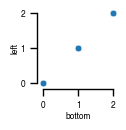

In [24]:
plt.figure(figsize=(1,1))
sns.scatterplot(x=[0,1,2],y=[0,1,2])
sns.despine(offset=2, trim=True)
plt.xlabel('bottom')
plt.ylabel('left')
plt.savefig('/Users/kperks/Downloads/fig_params_test.svg') 

In [23]:
filepath = Path('/Users/kperks/Documents/ell-connectome/efish_em')
filename = 'efish_em.mplstyle'
save_mplstyle(filepath / filename, sns.plotting_context(), sns.axes_style(), mpl_params, on_conflict="first", verbose=True)

In [27]:
default_rcParams = plt.rcParams.copy()

filepath = Path('/Users/kperks/Documents/ell-connectome/efish_em')
filename = 'matplotlib_default.mplstyle'
save_mplstyle(filepath / filename, default_rcParams, on_conflict="first", verbose=True)

In [26]:
sns.plotting_context()

{'font.size': 8.0,
 'axes.labelsize': 6.0,
 'axes.titlesize': 8.0,
 'xtick.labelsize': 6.0,
 'ytick.labelsize': 6.0,
 'legend.fontsize': 6.0,
 'legend.title_fontsize': 6.0,
 'axes.linewidth': 1.0,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.2000000000000002,
 'lines.markersize': 4.800000000000001,
 'patch.linewidth': 0.8,
 'xtick.major.width': 1.0,
 'ytick.major.width': 1.0,
 'xtick.minor.width': 0.8,
 'ytick.minor.width': 0.8,
 'xtick.major.size': 4.800000000000001,
 'ytick.major.size': 4.800000000000001,
 'xtick.minor.size': 3.2,
 'ytick.minor.size': 3.2}